In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os, sys
currentdir = os.path.dirname(os.path.abspath(os.getcwd()))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, currentdir) 

from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1})
from analysis_functions import find_analytic_fixed_points

def ReLU(x):
    return np.where(x<0,0,x)

def ELU(x, alpha=1):
    return np.where(x<0,alpha*(np.exp(x)-1),x)

C:\Users\abel_\anaconda3\envs\CIT_\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\abel_\AppData\Local\Temp\ipykernel_16944\4081577556.py:13: RuntimeWarning: divide by zero encountered in log
  speed = np.log(np.sqrt(U**2 + V**2))


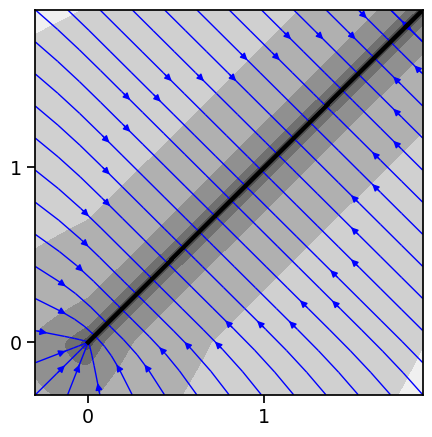

In [2]:
##LA
cmap = 'gray'
W_hh = np.array([[.0,1.0],[1,0]])
b =    0.*np.array([1.,1.])

w = 1.9
v = -.3
Y, X = np.mgrid[v:w:100j, v:w:100j]

W_hh_pert = W_hh.copy()  #+ eps_mat
U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='b') #for 3
contourf_ = axs.contourf(X, Y, speed, levels=range(-6,3), cmap=cmap)
axs.set(xlim=(v, w), ylim=(v, w))
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
axs.yaxis.set_major_locator(MaxNLocator(integer=True))
axs.plot([0,w], [0,w], color='black', linewidth=3.3)#separatrix
# axs.set_xticks([])
# axs.set_yticks([])
plt.savefig(currentdir+"/Stability/figures/lineattractor.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/lineattractor.png", bbox_inches="tight")
plt.show()

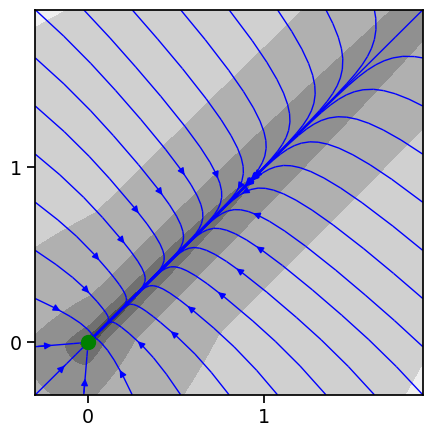

In [3]:
##LA: convergent
cmap = 'gray'
W_hh = np.array([[.0,1.0],[1,0]])
b =    0.*np.array([1.,1.])


W_hh_pert = W_hh  -0.05*np.array([[1,1],[1,1]])  # np.random.normal(-.1, .1, (2,2))
U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs.streamplot(X, Y, U, V, density=.3, broken_streamlines=False, color='b') #for 3
contourf_ = axs.contourf(X, Y, speed, levels=range(-6,3), cmap=cmap)
axs.set(xlim=(v, w), ylim=(v, w))
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
axs.yaxis.set_major_locator(MaxNLocator(integer=True))
axs.plot(0, 0, 'o', color='green', markersize=10)
# axs.set_xticks([])
# axs.set_yticks([])
plt.savefig(currentdir+"/Stability/figures/lineattractor_conv.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/lineattractor_conv.png", bbox_inches="tight")
plt.show()

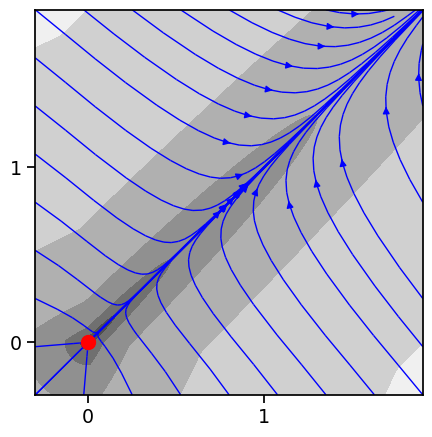

In [4]:
##LA: divvergent
cmap = 'gray'
W_hh = np.array([[.0,1.0],[1,0]])
b =    0.*np.array([1.,1.])

W_hh_pert = W_hh + 0.1*np.array([[1,1],[1,1]])    #DIVERGENT
U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs.streamplot(X, Y, U, V, density=.3, broken_streamlines=False, color='b') #for 3
strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='b', start_points=[[.01, .01]]) #for 3
contourf_ = axs.contourf(X, Y, speed, levels=range(-6,3), cmap=cmap)

axs.set(xlim=(v, w), ylim=(v, w))
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
axs.yaxis.set_major_locator(MaxNLocator(integer=True))
axs.plot(0, 0, 'o', color='red', markersize=10)
# axs.set_xticks([])
# axs.set_yticks([])
plt.savefig(currentdir+"/Stability/figures/lineattractor_div.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/lineattractor_div.png", bbox_inches="tight")
plt.show()

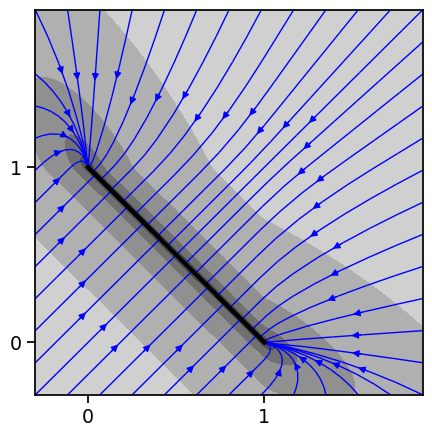

In [5]:
## BLA
cmap = 'gray'
W_hh = np.array([[.0,-1.0],[-1,0]])
b =    np.array([1.,1.])

#1
eps1 = -.1
eps2 = .05
eps_mat = np.array([[eps1,eps2],[eps2,eps1]])
#3
eps1 = .1
eps2 = -.2
# eps_mat = np.array([[eps1,eps2],[eps2,eps1]]) 

# W_hh_pert = W_hh.copy()-0.05*np.array([[1,1],[1,1]])
W_hh_pert = W_hh.copy()  #+ eps_mat
U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))
# fixed_point_list, stabilist, unstabledimensions = find_analytic_fixed_points(W_hh_pert, b, W_ih=np.zeros((2,2)), I=[0,0], tol=10**-4)

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
# strm = axs.streamplot(X, Y, U, V, density=.3, broken_streamlines=False, color='r')
strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='b') #for 3
# strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='r', start_points=[[fxdpnt[0]+.01, fxdpnt[1]-.01],[fxdpnt[0]-.01, fxdpnt[1]+.01]]) #for 3

contourf_ = axs.contourf(X, Y, speed, levels=range(-6,3), cmap=cmap)
axs.plot([0,1], [1,0], color='black', linewidth=3.3)#separatrix

axs.set(xlim=(v, w), ylim=(v, w))
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
axs.yaxis.set_major_locator(MaxNLocator(integer=True))
# axs.set_xticks([])
# axs.set_yticks([])
plt.savefig(currentdir+"/Stability/figures/lineattractor_0.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/lineattractor_0.png", bbox_inches="tight")
plt.show()

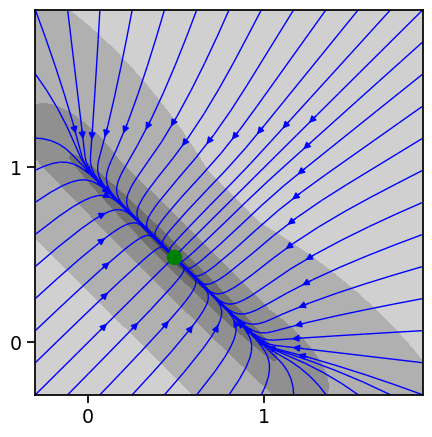

In [6]:
## BLA: Perturbation 1 Fixed points
cmap = 'gray'
W_hh = np.array([[.0,-1.0],[-1,0]])
b =    np.array([1.,1.])

#1
eps1 = -.1
eps2 = .05
eps_mat = np.array([[eps1,eps2],[eps2,eps1]])
#3
eps1 = .1
eps2 = -.2
# eps_mat = np.array([[eps1,eps2],[eps2,eps1]]) 

W_hh_pert = W_hh.copy()  + eps_mat
U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))
fixed_point_list, stabilist, unstabledimensions = find_analytic_fixed_points(W_hh_pert, b, W_ih=np.zeros((2,2)), I=[0,0], tol=10**-4)

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
# strm = axs.streamplot(X, Y, U, V, density=.3, broken_streamlines=False, color='r')
strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='b') #for 3
# strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='r', start_points=[[fxdpnt[0]+.01, fxdpnt[1]-.01],[fxdpnt[0]-.01, fxdpnt[1]+.01]]) #for 3
for fxdpnt in fixed_point_list:
    axs.plot(fxdpnt[0], fxdpnt[1], 'o', color='green', markersize=10)

contourf_ = axs.contourf(X, Y, speed, levels=range(-6,3), cmap=cmap)
axs.set(xlim=(v, w), ylim=(v, w))
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
axs.yaxis.set_major_locator(MaxNLocator(integer=True))
# axs.set_xticks([])
# axs.set_yticks([])
plt.savefig(currentdir+"/Stability/figures/lineattractor_1.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/lineattractor_1.png", bbox_inches="tight")
plt.show()

In [7]:
colors = ['pink', 'green']
fixed_point_list

[array([0.48780488, 0.48780488])]

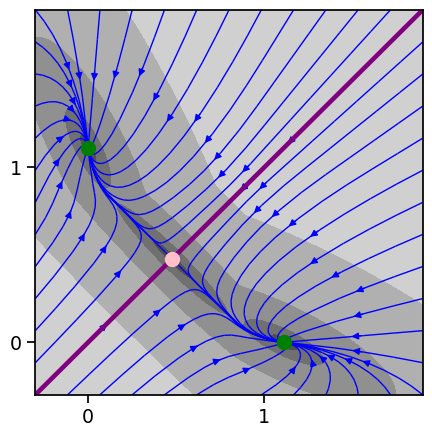

In [10]:
## BLA: Perturbation 3 Fixed points
cmap = 'gray'
W_hh = np.array([[.0,-1.0],[-1,0]])
b =    np.array([1.,1.])

#3
eps1 = .1
eps2 = -.2
eps_mat = np.array([[eps1,eps2],[eps2,eps1]]) 

W_hh_pert = W_hh.copy()  + eps_mat
U = ReLU(W_hh_pert[0,0]*X + W_hh_pert[0,1]*Y + b[0]) - X
V = ReLU(W_hh_pert[1,0]*X + W_hh_pert[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))
fixed_point_list, stabilist, unstabledimensions = find_analytic_fixed_points(W_hh_pert, b, W_ih=np.zeros((2,2)), I=[0,0], tol=10**-4)

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='b') #for 3
fxdpnt = fixed_point_list[-1]
strm = axs.streamplot(X, Y, U, V, density=.45, broken_streamlines=False, color='b', start_points=[[fxdpnt[0]+.01, fxdpnt[1]-.01],[fxdpnt[0]-.01, fxdpnt[1]+.01]]) #for 3
axs.plot([v,w], [v,w], color='purple', linewidth=3.3)   #separatrix
for i, fxdpnt in enumerate(fixed_point_list):
    axs.plot(fxdpnt[0], fxdpnt[1], 'o', color=colors[stabilist[i]], markersize=10)

contourf_ = axs.contourf(X, Y, speed, levels=range(-6,3), cmap=cmap)
axs.set(xlim=(v, w), ylim=(v, w))
axs.xaxis.set_major_locator(MaxNLocator(integer=True))
axs.yaxis.set_major_locator(MaxNLocator(integer=True))
# axs.set_xticks([])
# axs.set_yticks([])
plt.savefig(currentdir+"/Stability/figures/lineattractor_3.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/lineattractor_3.png", bbox_inches="tight")
plt.show()

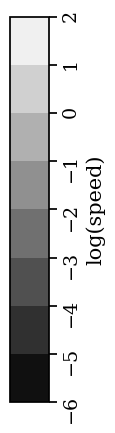

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(.5, 5), sharex=True, sharey=True)
cbar  = fig.colorbar(contourf_, cax=axs)
plt.ylabel("log(speed)", family='serif')
plt.yticks(rotation=90, family='serif')
plt.savefig(currentdir+"/Stability/figures/logspeedcolorbar.pdf", bbox_inches="tight")
plt.savefig(currentdir+"/Stability/figures/logspeedcolorbar.png", bbox_inches="tight")
plt.show()